# Human Resources Analysis (Predict Attrition)


# Table of contents
* [Import Data and Libraries](#Data_and_Libraries)
* [First Impressions](#$1^{st}$Impressions)
* [Analysing Data](#Analysing_Data)
    * [Feature Analyse](#Feature_Analyse)
* [Processing data](#Processing_data )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data_and_Libraries

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.tools
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

#Libraries for handling imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline

import warnings
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, r2_score,mean_squared_error
from sklearn.metrics import roc_curve

In [89]:
HR_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/HR-Attrition/HR_DS.csv")

# 1 Impressions

In [90]:
HR_data.shape

(1470, 35)

In [91]:
HR_data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [92]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [93]:
HR_data.isnull().values.any()

False

**As we can see above there are 1470 entries in the data and each has 35 parameters. From which, non is null**

**We can also see that there are 9 objects that correspond to categorical data that maybe need to be encoded**


# Analysing_Data

In [94]:
HR_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**We can se that some atributes have only one unique value so they dont give any aditional information.**

**We can also se that there are 1470 unique ID numbers so they can be used as indexes for the data.**

In [95]:
print(HR_data.EmployeeCount.unique())
print(HR_data.Over18.unique())
print(HR_data.StandardHours.unique())

[1]
['Y']
[80]


**Removing the features**
- Employee Count 
- Over 18 
- Standard Hours**

In [96]:
HR_data.drop(["EmployeeCount", "Over18", "StandardHours"], axis=1, inplace = True)
HR_data = HR_data.set_index('EmployeeNumber')

##### The goal of this analysis is to get insights into the Attrition rate and what motivates an employee's decision to leave the company. 

In [97]:
fig = px.bar(x=HR_data['Attrition'].value_counts().index,
             y=HR_data['Attrition'].value_counts(), 
             title='Attrition Distribution', 
             text=(HR_data['Attrition'].value_counts()/len(HR_data['Attrition'])*100))

fig.update_traces(textposition='outside', 
                  texttemplate='%{text:.4s}%',
                  marker = dict(color = ['darkslategray','teal'],line = dict(color = "black", width = 3)))

fig['layout'].update(height=500, width=600)
fig.show()

**Data is imbalanced as only 16% of the employees leave the companies and 83.3% continued their jobs.**

In [98]:
nf = np.array(HR_data.columns)
nf = np.delete(nf, 1)
row = int(np.round(len(HR_data.columns)/3))
fig = make_subplots(rows=row, cols=3,subplot_titles=nf)
# axes are in a two-dimensional array, indexed by [row, col]
counter = 0
for i in range(1,row+1):
    for j in range(1, 4):
        fig.add_trace(go.Box(x=HR_data["Attrition"], y=HR_data[nf[counter]], name=nf[counter]), row=i, col=j)
        counter = counter+1
fig.update_layout(height=2000, width=2200, title_text="Box plot of all the features VS Attrition 1-YES 0-NO")
fig.show()

**Affter loking at the Box Plots we can see a lot of features that are not relevant for our final goal, maybe later it would be a good experiment to try and remove them.**

## Feature_Analyse 

### Age

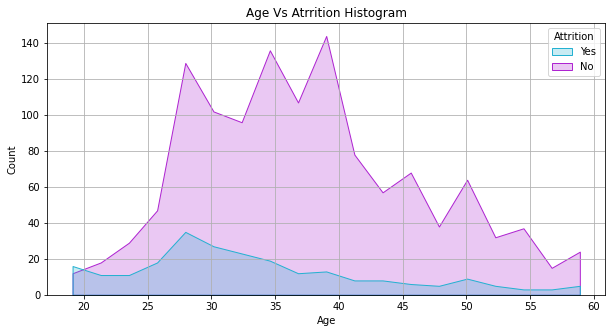

In [99]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age' ,hue='Attrition' , data=HR_data ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Age Vs Atrrition Histogram")
plt.grid()

**There is a small spike in Attrition between 25 and 30 which means that is more likely for an employee to quit at that age** 

### Distance From Home 

In [100]:
fig = px.histogram(x=HR_data['DistanceFromHome'],
                  marginal='box',
                  color=HR_data['Attrition'],
                  barmode='group',
                  nbins=25,
                  title='Distance From Home VS Attrition',
                  height=500,
                  width=800)
fig.show()

**As we can see distances doesn't seem to have a huge impact on Attrition**

### Environment Satisfaction

In [101]:
fig = px.pie(values =HR_data['EnvironmentSatisfaction'].value_counts(),
            names=HR_data['EnvironmentSatisfaction'].value_counts().index,
            title='Environment Satisfaction')
fig.show()

**Enviroment Satisfaction**

1. Low

2. Medium

3. High

4. Very High

**Almost 80% Employees are highly satisfied with work Environment.**

**And 20% employees are not satisfied**

In [102]:
fig = px.histogram(x=HR_data['EnvironmentSatisfaction'],
                  marginal='box',
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Environment Satisfaction VS Attrition',
                  )

fig.show()

**We can see that there is much more likely for an employee to leave if they are not satisfied**

### Job Involvement	

In [103]:
fig = px.pie(values=HR_data['JobInvolvement'].value_counts(),
            names=HR_data['JobInvolvement'].value_counts().index,
            title='Job Involvement')
fig.show()

**Job Involvement**

1. Low

2. Medium

3. High

4. Very High

**70% Employees are highly involved with their job.**

In [104]:
fig = px.histogram(x=HR_data['JobInvolvement'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Job Involvement VS Attriition')
fig.show()

In [105]:
print("Percentage of employees that have low job envolvment and quit", 100*28/(28+55))
print("Percentage of employees that have medium job envolvment and quit", 71*100/375)

Percentage of employees that have low job envolvment and quit 33.734939759036145
Percentage of employees that have medium job envolvment and quit 18.933333333333334


**As proven above there is a much higher percentage of Attrition when the job involvement is low**

### Job Role

In [106]:
fig = px.bar(x=HR_data['JobRole'].value_counts().index, 
             y=HR_data['JobRole'].value_counts(),
            text = (HR_data['JobRole'].value_counts()/len(HR_data['JobRole'])*100),
            title='Job Role',
            height=600,
            width=800)
fig.update_traces(textposition='outside', texttemplate = '%{text:.4s}%', marker=dict(line=dict(color='black', width=1)))

In [107]:
fig = px.histogram(x=HR_data['JobRole'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=900,
                  title='Job Role VS Attrition')

fig.show()

**Highest Attrition rates are seen among Sales Representatives with almost 40% atrition rate**.

### Job Level

In [108]:
fig = px.pie(values=HR_data['JobLevel'].value_counts(), 
             names=HR_data['JobLevel'].value_counts().index,
            title='Job Level')
fig.show()

In [109]:
fig = px.histogram(x=HR_data['JobLevel'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Job Level VS Attrition')
fig.show()

**Low job level reports have high Attrition**

### JobSatisfaction

In [110]:
fig = px.pie(values=HR_data['JobSatisfaction'].value_counts(), 
             names=HR_data['JobSatisfaction'].value_counts().index,
            title='Job Satisfaction')
fig.show()

**Job Satisfaction**

1. Low

2. Medium

3. High

4. Very High

**60% Employees are Satisfied with their Job**

In [111]:
fig = px.histogram(x=HR_data['JobSatisfaction'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Job Satisfaction VS Attrition')
fig.show()

### Marital Status

In [112]:
fig = px.pie(values=HR_data['MaritalStatus'].value_counts(), 
             names=HR_data['MaritalStatus'].value_counts().index,
            title=' Marital Status')
fig.show()

In [113]:
fig = px.histogram(x=HR_data['MaritalStatus'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Marital Status VS Attrition')
fig.show()

In [114]:
print("Percentage of employees that are Single and quit is", 100*120/(120+350))
print("Percentage of employees that are Maried and quit is", 84*100/(589+84))
print("Percentage of employees that are Divorced and quit is", 33*100/(294+33))

Percentage of employees that are Single and quit is 25.53191489361702
Percentage of employees that are Maried and quit is 12.481426448736999
Percentage of employees that are Divorced and quit is 10.091743119266056


**Single employees are more than 10% more likly to quit there jobs**

### Monthly Income

In [115]:
fig = px.histogram(x = HR_data['MonthlyIncome'], 
                  nbins = 100,
                  title='Monthly Income Distribution',
                  height=500,
                  width=600,
                )
fig.show()

**Monthly Income range between 1k to upto 20k.**

In [116]:
fig = px.histogram(x=HR_data['MonthlyIncome'],
                  marginal='box',
                  color=HR_data['Attrition'],
                  height=500,
                  width=700,
                  barmode='group',
                  title='Monthly Income VS Attrition')
fig.show()

**Employees with low income are more likly to quit**

### Over Time

In [117]:
fig = px.pie(values=HR_data['OverTime'].value_counts(), 
             names=HR_data['OverTime'].value_counts().index,
            title='Over Time')
fig.show()

In [118]:
fig = px.histogram(x=HR_data['OverTime'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Over Time VS Attrition')
fig.show()

In [119]:
print("Percentage of employees that work over time and quit is", 100*127/(127+289))
print("Percentage of employees that dont work over time and quit is", 110*100/(994+110))

Percentage of employees that work over time and quit is 30.528846153846153
Percentage of employees that dont work over time and quit is 9.96376811594203


**More than 30% of employees that work over time quit**

### Stock Option Level

In [120]:
fig = px.pie(values=HR_data['StockOptionLevel'].value_counts(), 
             names=HR_data['StockOptionLevel'].value_counts().index,
            title='Stock Options Level')
fig.show()

In [121]:
fig = px.histogram(x=HR_data['StockOptionLevel'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Stock Options Level VS Attrition')
fig.show()

In [122]:
(154+56)*100/(154+56+12+15)

88.60759493670886

**88% of th employees that leave the company are in level 0 or 1 of Stock Options**

### Total Working Years

In [123]:
fig = px.histogram(x=HR_data['TotalWorkingYears'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Total Working Years VS Attrition')
fig.show()

**Employees who quit are those with less expirience (les Working years). Especially with 1 year** 

### Years At Company

In [124]:
fig = px.histogram(x=HR_data['YearsAtCompany'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Years at Company VS Attrition')
fig.show()

**Is mutch more likely that a employee leaves the company after the first year**

###  Years In Current Role

In [125]:
fig = px.histogram(x=HR_data['YearsInCurrentRole'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Years In Current Role VS Attrition')
fig.show()

**We can see that there is a huge increase in the number of Attrition from employees that don't evolve within the company after 2 years**

### Years With Current Manager

In [126]:
fig = px.histogram(x=HR_data['YearsWithCurrManager'],
                  color=HR_data['Attrition'],
                  barmode='group',
                  height=500,
                  width=700,
                  title='Years With Current Manager VS Attrition')
fig.show()

**The same from Years in current Role apply to the Manager as they are strong correlated**

# Processing_data 
**In order to prepare the data for Machine Learning algorithms and to have better correlations, in the long run, let's process and clean the data.** 

- First let's make a copy of the initial data set 


In [127]:
# copy the data
Full_HR_data = HR_data.copy()

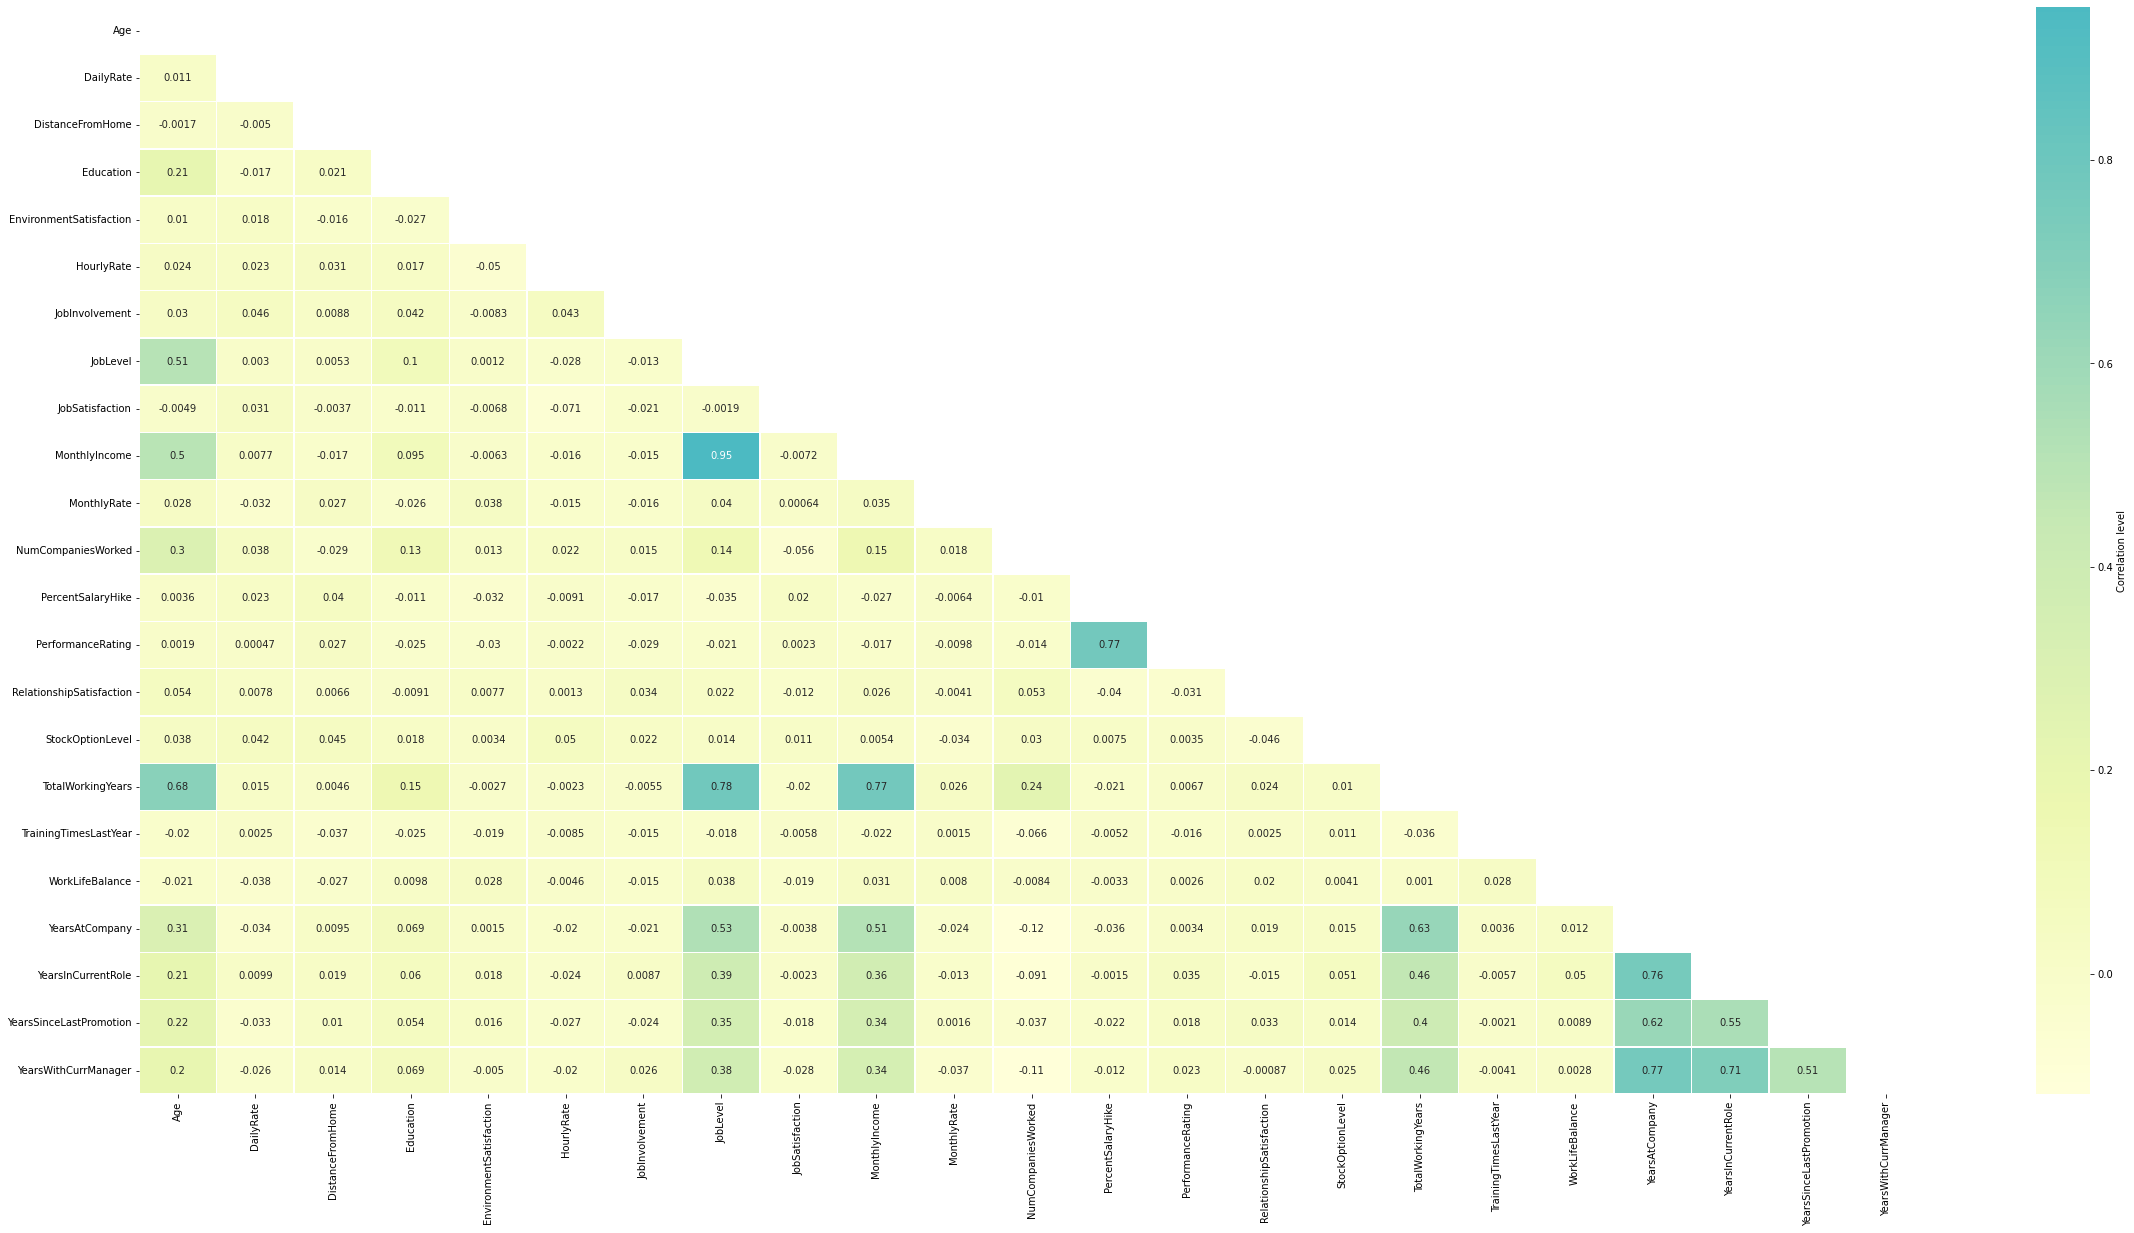

In [128]:
corrMatrix =Full_HR_data.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 20))
ax = sns.heatmap(corrMatrix, linewidths=.5 ,annot=True, center=1,cmap="YlGnBu" ,mask=mask, cbar_kws={'label': 'Correlation level'},xticklabels=True)
plt.show()

### Correlation Matrix


**From the correlation heatmap above we can see that some features have few to no significance in the final --Attrition-- outcome. The most correlated feature with Attrition appears to be Overtime.**

**Nevertheless is interesting to point out some strong correlations that appear:**
- Job level is highly correlated with salary, years at the company, job level, and age, all these correlations seem to be normal. 
- We can also say that it tends to be difficult to get a promotion as the Job level increases. 
- There is a correlation between performance and salary Hike
- A fun correlation is the Marital Status and Stock Option Level 

**As we can see most of the strong correlations involve Working Years and especially Years at the company that will increase Job Level as well as Years at Current Role, which means that with time it gets difficult to "climb the lather" in the company. This is something to have in mind because it can impact Attrition.** 

**Separate numerical from categorical features**

In [129]:
categorical_feature_mask = HR_data.dtypes==object
categorical_features = HR_data.columns[categorical_feature_mask].tolist()

numeric_feature_mask = HR_data.dtypes!=object
numeric_features = HR_data.columns[numeric_feature_mask].tolist()

In [130]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [131]:
categorical_features.remove('Attrition')

## Pipeline
### Setting up Numeric and Categorical Pipelines

#### 1. Categorical

In [132]:
categorical_transformer = Pipeline(steps=[
                                         ('oneHot', OneHotEncoder(handle_unknown='ignore')),
                                         ])

In [133]:
HR_data_sample = HR_data.copy()

#### 2. Numeric

In [134]:
numeric_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('StdScaler' , StandardScaler() )
                                    ])

In [135]:
HR_data[numeric_features] = numeric_transformer.fit_transform(HR_data[numeric_features])
HR_data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.446350,Yes,Travel_Rarely,0.742527,Sales,-1.010909,-0.891688,Life Sciences,-0.660531,Female,1.383138,0.379672,-0.057788,Sales Executive,1.153254,Single,-0.108350,0.726020,2.125136,Yes,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
2,1.322365,No,Travel_Frequently,-1.297775,Research & Development,-0.147150,-1.868426,Life Sciences,0.254625,Male,-0.240677,-1.026167,-0.057788,Research Scientist,-0.660853,Married,-0.291719,1.488876,-0.678049,No,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
4,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,-0.887515,-0.891688,Other,1.169781,Male,1.284725,-1.026167,-0.961486,Laboratory Technician,0.246200,Single,-0.937654,-1.674841,1.324226,Yes,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935


### Combine the pipelines

In [136]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [137]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names



# Feature select

In [54]:
HR_prepared_labels = pd.DataFrame(pd.factorize(HR_data['Attrition'])[0], columns=["Attrition"], index=HR_data.index)
HR_data = HR_data.drop('Attrition',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [55]:
HR_encoded = pd.DataFrame(preprocessor.fit_transform(HR_data), columns=get_feature_names(preprocessor), index= Full_HR_data.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning:

Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning:

Transformer StdScaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [56]:
fit = SelectKBest(score_func=f_classif,k='all').fit(HR_encoded, HR_prepared_labels.Attrition)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(HR_encoded.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
#print(feature_scores.sort_values(by=['Score'])) 


In [57]:
remove = feature_scores[feature_scores['Score']<10].Feature_Name
HR_encoded = HR_encoded.drop(remove,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [58]:
HR_encoded.shape

(1470, 23)

In [59]:
full_pipeline = Pipeline(steps = [
         ("preparation", preprocessor),
         ('Select_best' , SelectKBest(score_func=f_classif,k=23)),
    ])

In [60]:
fit = full_pipeline.fit_transform(Full_HR_data.drop('Attrition',1),Full_HR_data.Attrition)
indice  = full_pipeline.named_steps['Select_best'].get_support(indices = True)
columns = np.array(get_feature_names(preprocessor))[indice]
HR_prepared = pd.DataFrame(fit, columns=columns, index= Full_HR_data.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning:

Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning:

Transformer StdScaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [61]:
HR_prepared.shape

(1470, 23)

# **Model Selection**



In [239]:
accuracies =dict()
recall = dict()
f1 = dict()
roc_auc = dict()

In [240]:
y = HR_prepared_labels.Attrition

In [241]:
x.columns = x.columns.str.replace(' ', '_')
x.columns = x.columns.str.replace('&', 'and')

In [242]:
x = HR_prepared
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42 ,test_size=0.2,stratify=y)

### RandomForest

In [206]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

In [207]:
f1['RandomForest Classifier'] = f1_score(y_test,y_pred, average='macro')
accuracies['RandomForest Classifier'] = accuracy_score(y_pred, y_test)
recall['RandomForest Classifier'] = metrics.recall_score(y_test,y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc['RandomForest Classifier'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.26      0.36        47
           1       0.87      0.97      0.92       247

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



###  LGBM Classifier

In [208]:
lgbm = LGBMClassifier()

lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)


accuracies['LGBM Classifier'] = accuracy_score( y_test, y_pred)
recall['LGBM Classifier'] = metrics.recall_score(y_test,y_pred)
f1['LGBM Classifier'] = f1_score(y_test,y_pred, average='macro')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc['LGBM Classifier'] = metrics.auc(fpr, tpr)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.32      0.39        47
           1       0.88      0.94      0.91       247

    accuracy                           0.84       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.82      0.84      0.83       294



In [209]:
recall = pd.DataFrame(list(recall.items()), columns=['Model', 'Recall Score'])
accuracies = pd.DataFrame(list(accuracies.items()),columns=['Model','Accuracy Score'])
f1 = pd.DataFrame(list(f1.items()),columns=['Model','f1_score_macroavg'])
roc_auc =  pd.DataFrame(list(roc_auc.items()),columns=['Model','AUC Score'])

### Model Comparation

In [210]:
accuracies_df = pd.merge(accuracies, recall,on='Model')
accuracies_df = pd.merge(accuracies_df, f1,on='Model')
accuracies_df = pd.merge(accuracies_df, roc_auc,on='Model')
accuracies_df

,Model,Accuracy Score,Recall Score,f1_score_macroavg,AUC Score
0,RandomForest Classifier,0.857143,0.971660,0.641588,0.61349
1,LGBM Classifier,0.840136,0.939271,0.648817,0.62921


# Handling Imbalance Data

## Smote (OverSampling)

Since data is highly imbalance accuracy scores of trivial prediction model is completely useless as it has absolutely no discriminatory power.
Data needs to be balance for more accurate prediction.

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [211]:
# before applying smote
        
print('Number of one count is:', len(y_train[y_train == 1]) )
print('Number of zero count is: ', len(y_train[y_train == 0]))

Number of one count is: 986
Number of zero count is:  190


In [212]:
oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train, y_train)

In [213]:
# after applying smote
        
print('Number of one count is:', len(y_train1[y_train1 == 1]) )
print('Number of zero count is: ', len(y_train1[y_train1 == 0]))

Number of one count is: 986
Number of zero count is:  986


In [214]:
accuracies_smote = dict()
recall_smote = dict()
f1_smote = dict()
auc_smote = dict()

In [215]:
#LGBM Classifier After SMOTE

lgbm.fit(x_train1, y_train1)
y_smote_pred = lgbm.predict(x_test)


accuracies_smote['LGBM Classifier'] = accuracy_score(y_test,y_smote_pred)
recall_smote['LGBM Classifier'] = metrics.recall_score(y_test,y_smote_pred)
f1_smote['LGBM Classifier']= f1_score(y_test,y_smote_pred, average='macro')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_smote_pred)
auc_smote['LGBM Classifier'] = metrics.auc(fpr, tpr)

print(classification_report(y_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36        47
           1       0.87      0.93      0.90       247

    accuracy                           0.83       294
   macro avg       0.66      0.61      0.63       294
weighted avg       0.81      0.83      0.82       294



In [216]:
#RandomForest After SMOTE

rf.fit(x_train1, y_train1)
y_smote_pred =rf.predict(x_test)


accuracies_smote['RandomForest Classifier'] = accuracy_score(y_test,y_smote_pred )
recall_smote['RandomForest Classifier'] = metrics.recall_score(y_test,y_smote_pred)
f1_smote['RandomForest Classifier']= f1_score(y_test,y_smote_pred, average='macro')
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_smote_pred)
auc_smote['RandomForest Classifier'] = metrics.auc(fpr, tpr)


print(classification_report(y_test, y_smote_pred))


              precision    recall  f1-score   support

           0       0.51      0.38      0.44        47
           1       0.89      0.93      0.91       247

    accuracy                           0.84       294
   macro avg       0.70      0.66      0.67       294
weighted avg       0.83      0.84      0.83       294



In [217]:
recall_smote = pd.DataFrame(list(recall_smote.items()),columns=['Model','Recall Score'])
accuracies_smote = pd.DataFrame(list(accuracies_smote.items()), columns=['Model', 'Accuracy Score'])
f1_smote = pd.DataFrame(list(f1_smote.items()), columns=['Model', 'f1 score'])
auc_smote = pd.DataFrame(list(auc_smote.items()), columns=['Model', 'AUC Score'])

### Model Comparation

In [218]:
smote_df = pd.merge(accuracies_smote, recall_smote, on='Model')
smote_df = pd.merge(smote_df, f1_smote, on='Model')
smote_df = pd.merge(smote_df, auc_smote, on='Model')
smote_df

,Model,Accuracy Score,Recall Score,f1 score,AUC Score
0,LGBM Classifier,0.829932,0.931174,0.630468,0.614523
1,RandomForest Classifier,0.843537,0.931174,0.674058,0.657076


# Fine-tune your model

In [219]:
from imblearn.pipeline import make_pipeline
test_pipeline_with_smote = make_pipeline(
        SMOTE(), RandomForestClassifier(random_state=42)
)

In [220]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [221]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(rf, x_train1, y_train1,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.47140452 0.40824829 0.23629973 0.07124705 0.22530295 0.15931325
 0.18850198 0.20151709 0.15931325 0.21374115]
Mean: 0.23348892565633217
Standard deviation: 0.11312915815043863


In [222]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'randomforestclassifier__n_estimators': [80,100,150,200], 'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'randomforestclassifier__bootstrap': [False], 'randomforestclassifier__n_estimators': [150,200,250,300,500], 'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']},
  ]

grid_search = GridSearchCV(test_pipeline_with_smote, param_grid, cv=5,
                           scoring='roc_auc',
                           refit='AUC',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'randomforestclassifier__max_features': ['auto',
                                                                   'sqrt',
                                                                   'log2'],
                          'randomforestclassifier__n_estimators': [80, 100, 150,
                                                                   200]},
                         {'randomforestclassifier__bootstrap': [False],
                          'randomforestclassifier__max_features': ['auto',
                                                                   'sqrt',
                                                                   'log2'],
                          'randomforestclassifier__n_estimators': [150, 200,
                

In [223]:
param_dict = grid_search.best_params_

In [224]:
param_dict = {x.replace("randomforestclassifier__", ""): v for x, v in param_dict.items()}

In [225]:
grid_search.best_estimator_

Pipeline(steps=[('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2', random_state=42))])

In [226]:
grid_search.best_score_

0.8143114284711934

In [227]:
grid_search.scoring

'roc_auc'

In [228]:
grid_search.score(x_test,y_test)

0.7542423981393747

## Create a Random Forest Model Object with the values from GridSearch

In [243]:
randForestModel = RandomForestClassifier(n_estimators=150, random_state=42)
randForestModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

# Pickeling/Serializing 
Pickle is used for serializing and de-serializing Python object structures, also called marshalling or flattening. Serialization refers to the process of converting an object in memory to a byte stream that can be stored on disk or sent over a network. Later on, this character stream can then be retrieved and de-serialized back to a Python object. Pickling is not to be confused with compression! The former is the conversion of an object from one representation (data in Random Access Memory (RAM)) to another (text on disk), while the latter is the process of encoding data with fewer bits, in order to save disk space.

In [230]:
import pickle

In [244]:
filename = '/content/drive/MyDrive/Colab_Notebooks/HR-Attrition/HR-RandomForest.pkl'
with open(filename,'wb') as outfile:
  pickle.dump(randForestModel,outfile)
